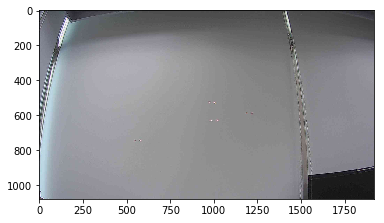

x: 500
y: 400


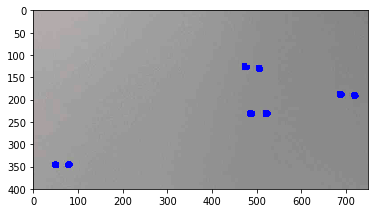

紅點座標: [(123, 503), (341, 52), (223, 485), (237, 527), (340, 82), (181, 691), (193, 722), (133, 475)]


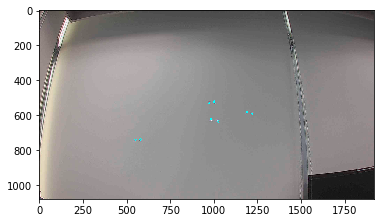

In [3]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

image_path= r'D:\Roger\AI_team\NANYA\red_dot\rawdata\20.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 裁切區域的 x 與 y 座標（左上角）
x = input("x: ")
x=int(x)
y = input("y: ")
y=int(y)

# 裁切區域的長度與寬度
w = 750
h = 400

# 裁切圖片
crop_img = image[y:y+h, x:x+w]

image_gray=cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
corners=cv2.cornerHarris(image_gray, 7,5,0.05)#水平和垂直方向的阈值，步长，迭代精度
#plt.imshow(corners,cmap ='gray')
#plt.show()
#锐化，边缘变得更加清晰
corners=cv2.dilate(corners,None)
#plt.imshow(corners,cmap ='gray')
#plt.show()

mixture= crop_img.copy()
mixture[corners>corners.max()*0.001]=[0,0,255]
plt.imshow(mixture,cmap ='gray')

plt.savefig("20_p.png")
plt.show()

indices = np.where(mixture == [0,0,255])
coordinates = zip(indices[0], indices[1])
unique_coordinates = list(set(list(coordinates)))
eight=[]
for i, element in enumerate(unique_coordinates):
    if i ==0:
        eight.append(element)
    else:
        
        for j in eight:
            a=0
            delta=(element[0]-j[0])**2+(element[1]-j[1])**2
            if delta<800:    
                a=1
                break
        if a==0:
            eight.append(element)
print("紅點座標:",eight)

mixture= image.copy()
for i in eight:
    cv2.circle(mixture,(i[1]+x,i[0]+y), 4, (0, 255, 255), 3)
plt.imshow(mixture,cmap ='gray')

plt.savefig("20_reddot.png")
plt.show()